#### PASCAL VOC 2012 데이터 다운로드 받기

* 각 이미지의 정보는 1대1 mapping된다

In [ ]:
# == sub directory 만들기 ==
!mkdir ./pascal_data

# == pascal2012 data 가져오기 ==
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

# == xvf로 압축 해제하여 pascal_data에 저장하기 ==
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/pascal_data

In [5]:
# == 현재 directory에서 VOC2012의 파일과 폴더를 나열 ==
!ls pascal_data/VOCdevkit/VOC2012

# == JPEGimages에서 위의 5가지만 출력 ==
!ls pascal_data/VOCdevkit/JPEGimages | head -n 5

Annotations  ImageSets	JPEGImages  SegmentationClass  SegmentationObject
ls: cannot access 'pascal_data/VOCdevkit/JPEGimages': No such file or directory


In [ ]:
# == 경로 나열하기 ==
!ls pascal_data/VOCdevkit/VOC2012

# == JPEGImages에서 처음 5개 이미지 불러오기 ==
!ls pascal_data/VOCdevkit/VOC2012/JPEGImages | head -n 5

#### 불러온 이미지 시각화

img shape: (281, 500, 3)


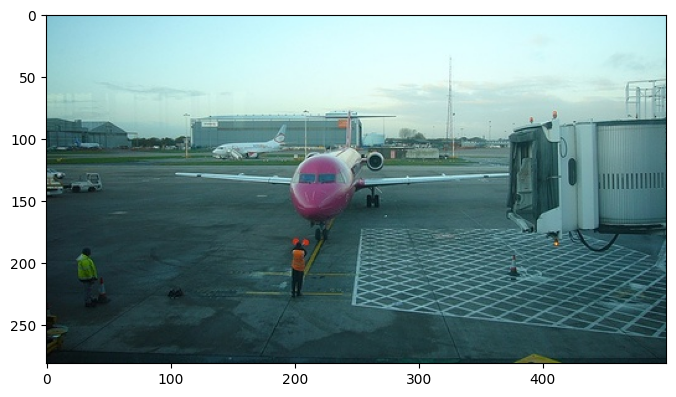

In [14]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('pascal_data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
# plt.axis("off")
plt.show()

#### Annotations directory에 있는 annotation 파일보기

##### 정보들

* Image size

* bounding box


In [21]:
!cat pascal_data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

#### SegmentationObject 디렉토리에 있는 있는 임의의 maksing 이미지 보기

img shape: (281, 500, 3)


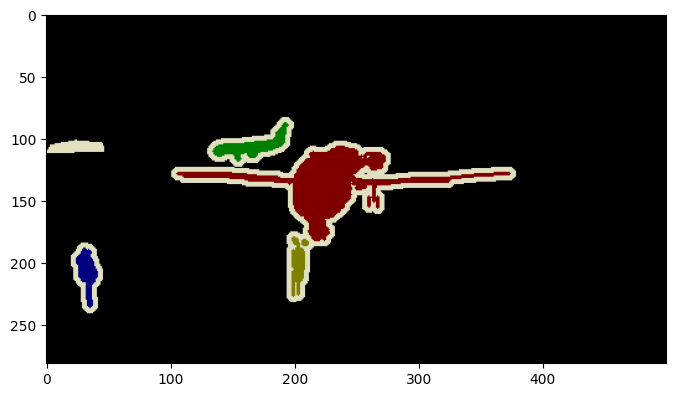

In [13]:
img = cv2.imread('pascal_data/VOCdevkit/VOC2012/SegmentationObject/2007_000032.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

#### Annotation xml 파일에 있는 요소들을 파싱하여 접근하기

* ElementTree를 이용하여 XML 파싱

* pascal data가 XML Format을 가지고 있음

In [16]:
import os
import random

VOC_ROOT_DIR ="pascal_data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

# == os.listdir()는 인자로 전달된 directory 경로에 있는 파일과 폴더의 목록을 list로 반환한다. ==
xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5]); print(len(xml_files))

['2008_003420.xml', '2008_005875.xml', '2010_000545.xml', '2011_000502.xml', '2008_005361.xml']
17125


In [31]:
#!pip install lxml

import xml.etree.ElementTree as ET

# == 2007_000032.xml 경로 지정 ==
xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# == XML 파일을 파싱하여 element(root) 생성 ==
tree = ET.parse(xml_file)

# == Annotation기준으로 root를 생성한다 ==
root = tree.getroot()

# == image 정보 추출 ==
image_name = root.find("filename").text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find("size")
image_width = int(image_size.find("width").text)
image_height = int(image_size.find("height").text)

print(f"image_name : {image_name}\nimage_width : {image_width}\nimage_height : {image_height}")

# == 파일내에 있는 모든 object element 찾기 ==
objects_list = []

# == findall은 모든 type 찾아줌, find는 1개만 찾아줌 ==
for obj in root.findall("object"):

  # == bounding box 좌표찾기 ==
  xml_box = obj.find("bndbox")

  x1 = int(xml_box.find("xmin").text)
  y1 = int(xml_box.find("ymin").text)
  x2 = int(xml_box.find("xmax").text)
  y2 = int(xml_box.find("ymax").text)

  bndbox_pos = (x1, y1, x2, y2)

  # == 해당 bounding box의 객체 이름 찾기 ==
  object_name = obj.find("name").text

  # == 해당 bounding box와 mapping되는 class이름 저장 ==
  object_info = {"class_name" : object_name, "bndbox_pos" : bndbox_pos}
  objects_list.append(object_info)

print(objects_list)

image_name : 2007_000032.jpg
image_width : 500
image_height : 281
[{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}, {'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}, {'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}, {'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}]


#### 위에서 찾은 값을 토대로 Bbox와 text image에 시각화하기

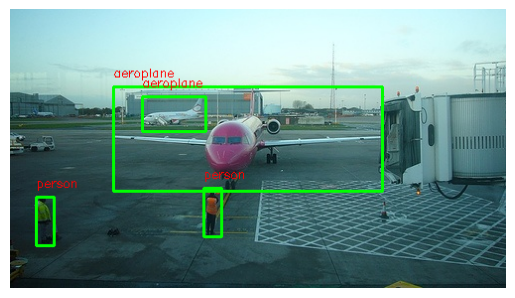

In [53]:
import cv2

img = cv2.imread(full_image_name)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



for obj in root.findall("object"):

  # == bounding box 좌표찾기 ==
  xml_box = obj.find("bndbox")
  object_name = obj.find("name").text

  x1 = int(xml_box.find("xmin").text)
  y1 = int(xml_box.find("ymin").text)
  x2 = int(xml_box.find("xmax").text)
  y2 = int(xml_box.find("ymax").text)

  cv2.rectangle(img_rgb, (x1, y1), (x2, y2), color = (0, 255, 0), thickness = 2)
  cv2.putText(img_rgb, object_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), thickness=1)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()